# 03.02 배열의 생성과 변형

## NumPy의 자료형

NumPy의 배열 즉, `ndarray`클래스는 데이터가 **같은 자료형이어야** 한다. `array` 명령으로 배열을 만들 때 자료형을 명시적으로 적용하려면 `dtype` 인수를 사용한다. 만약 `dtype` 인수가 없으면 주어진 데이터를 저장할 수 있는 자료형을 스스로 유추한다. 만들어진 배열의 자료형을 알아내려면 `dtype` 속성을 본다.

In [1]:
import numpy as np

x = np.array([1, 2, 3])
x.dtype

dtype('int64')

In [2]:
x = np.array([1.0, 2.0, 3.0])
x.dtype

dtype('float64')

In [3]:
x = np.array([1, 2, 3.0])
x.dtype

dtype('float64')

---------------

 `dtype` 인수로 지정할 자료형은 다음 표에 보인것과 같은 "dtype 접두사"로 시작하는 문자열이고 이 글자 뒤에 오는 숫자는 바이트 수 혹은 글자 수를 의미한다. 예를 들어 `f8`은 8바이트(64비트) 부동소수점 실수를 뜻하고 `U4` 는 4글자 유니코드 문자열을 뜻한다. 숫자를 생략하면 운영체제에 따라 알맞은 크기를 지정한다.

| dtype 접두사 | 설명 | 사용 예 |
|-|-|-|
| `b` | 불리언 | `b` (참 혹은 거짓) | 
| `i` | 정수 | `i8` (64비트) | 
| `u` | 부호 없는 정수 | `u8` (64비트) | 
| `f` | 부동소수점 | `f8` (64비트) | 
| `c` | 복소 부동소수점 | `c16` (128비트) | 
| `O` | 객체 | `0` (객체에 대한 포인터) | 
| `S` | 바이트 문자열 | `S24` (24 글자) | 
| `U` | 유니코드 문자열 | `U24` (24 유니코드 글자) | 

표 4.1.1 : dtype 인수로 지정할 자료형

In [4]:
x = np.array([1, 2, 3], dtype='f')
x.dtype

dtype('float32')

In [5]:
x[0] + x[1]

np.float32(3.0)

In [6]:
x = np.array([1, 2, 3], dtype='U')   # Unicode
x.dtype

dtype('<U1')

In [7]:
x

array(['1', '2', '3'], dtype='<U1')

In [8]:
x[0] + x[1]

'12'

## Inf와 NaN

NumPy에서는 무한대를 표현하기 위한 **`np.inf`(infinity)** 와 정의할 수 없는 숫자를 나타내는 **`np.nan`(not a number)** 을 사용할 수 있다. 다음 예와 같이 1을 0으로 나누려고 하거나 0에 대한 로그 값을 계산하면 무한대인 **`np.inf`** 이 나온다. 0을 0으로 나누려고 시도하면 **`np.nan`** 이 나온다.

In [9]:
import math
math.inf 

inf

In [10]:
-math.inf

-inf

In [11]:
1 / math.inf

0.0

In [12]:
## warning 숨기기... 나타내기 (주피터 노트북)
import warnings
warnings.filterwarnings(action='ignore') 
# warnings.filterwarnings(action='default')

In [13]:
np.array([0, 1, -1, 0]) / np.array([1, 0, 0, 0])

array([  0.,  inf, -inf,  nan])

In [14]:
np.log(0)       ## 밑수가 e 인 로그함수

np.float64(-inf)

![](https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile30.uf.tistory.com%2Fimage%2F2652D93358E24E7E2E9000)

In [15]:
np.exp(-np.inf)

np.float64(0.0)


![](https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile2.uf.tistory.com%2Fimage%2F274F6F3358E24E7D0EEFE1)

## 배열 생성

NumPy는 몇가지 간단한 배열을 생성하는 명령을 제공한다.
 
* `zeros`, `ones`
* `zeros_like`, `ones_like`
* `empty`
* `arange`
* `linspace`, `logspace`
* `rand`, `randn`

## Array 초기화

### (1) 0으로 초기화
크기가 정해져 있고 모든 값이 0인 배열을 생성하려면 **`zeros` 명령**을 사용한다. 인수로는 배열을 크기를 뜻하는 정수를 넣는다.

In [16]:
a = np.zeros(5)
a

array([0., 0., 0., 0., 0.])

크기를 뜻하는 튜플을 입력하면 **다차원 배열**도 만들 수 있다.

In [17]:
b = np.zeros((2, 3))
b

array([[0., 0., 0.],
       [0., 0., 0.]])

`array` 명령과 마찬가지로 **`dtype` 인수**를 명시하면 해당 자료형 원소를 가진 배열을 만든다.

In [18]:
c = np.zeros((5, 2), dtype="i")
c

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int32)

문자열 배열도 가능하지면 모든 원소의 문자열 크기가 같아야 한다. 만약 더 큰 크기의 문자열을 할당하면 잘릴 수 있다.

In [19]:
d = np.zeros(5, dtype="U4")   # Unicode 4글자...
d

array(['', '', '', '', ''], dtype='<U4')

In [20]:
d[0] = "abc"
d[1] = "abcd"
d[2] = "ABCDE"
d

array(['abc', 'abcd', 'ABCD', '', ''], dtype='<U4')

---
0이 아닌 **1로 초기화**된 배열을 생성하려면 **`ones` 명령**을 사용한다.

In [21]:
e = np.ones((2, 3, 4), dtype="i8")  ## i8 : integer 8 byte
e

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]])

---
만약 크기를 튜플로 명시하지 않고 다른 배열과 같은 크기의 배열을 생성하고 싶다면 **`ones_like`, `zeros_like` 명령**을 사용한다.

In [22]:
f = np.ones_like(b, dtype="f")
f

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

---
배열의 크기가 커지면 배열을 **초기화하는데도 시간**이 걸린다. 이 **시간을 단축**하려면 **배열을 생성만** 하고 특정한 값으로 초기화를 하지 않는 **`empty`** 명령을 사용할 수 있다. `empty` 명령으로 생성된 배열에는 기존에 메모리에 저장되어 있던 값이 있으므로 배열의 원소의 값을 미리 알 수 없다.

In [23]:
g = np.empty((4, 3))
g

array([[1.01875032e-311, 2.47032823e-322, 0.00000000e+000],
       [0.00000000e+000, 6.23054293e-307, 1.58817677e-052],
       [5.49704234e-090, 4.42510227e-062, 8.26905452e-072],
       [4.51499960e-037, 3.99910963e+252, 1.11010381e-047]])

---
## `arange`

**`arange`** 명령은 NumPy 버전의 `range` 명령이라고 볼 수 있다. 특정한 규칙에 따라 증가하는 수열을 만든다. 

In [24]:
np.arange(10)  # 0 .. n-1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
np.arange(3, 21, 2)  # 시작, 끝(포함하지 않음), 단계

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19])

In [26]:
[i for i in range(10)]  # 참고: 리스트... 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

---
## `linspace`, `logspace`

`linspace` 명령이나 `logspace` 명령은 선형 구간 혹은 로그 구간을 지정한 구간의 수만큼 분할한다.

### 1. linspace

**a와 b사이에 c개의 점을 생성**하기 위한 명령어입니다.

만약에 c가 생략될 경우 → linspace(a, b) 50개의 일정한 등간격을 가진 행 벡터가 생성됩니다.

* 사용 방법 : **`np.linspace(시작, 끝, 갯수, endpoint=True/False)`**

In [27]:
np.linspace(0, 100, 5)  # 시작, 끝(포함), 갯수

array([  0.,  25.,  50.,  75., 100.])

In [28]:
np.linspace(0, 10, 10, endpoint=False)   # endpoint = True / False

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [29]:
np.linspace(0, 10, 10, endpoint=True)  # default

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [30]:
np.linspace(0, 10, 10)

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [31]:
np.linspace(1, 50)  # 갯수 생략시 50개

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

In [32]:
np.logspace(0.1, 1, 10)

array([ 1.25892541,  1.58489319,  1.99526231,  2.51188643,  3.16227766,
        3.98107171,  5.01187234,  6.30957344,  7.94328235, 10.        ])

In [33]:
10**0.02, 10**0.03

(1.0471285480508996, 1.0715193052376064)

In [34]:
np.linspace(0.1, 2.0, num=20)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [35]:
np.logspace(0.1, 2.0, num=20)

array([  1.25892541,   1.58489319,   1.99526231,   2.51188643,
         3.16227766,   3.98107171,   5.01187234,   6.30957344,
         7.94328235,  10.        ,  12.58925412,  15.84893192,
        19.95262315,  25.11886432,  31.6227766 ,  39.81071706,
        50.11872336,  63.09573445,  79.43282347, 100.        ])

In [36]:
10**0.1, 10**0.2, 10**0.3, 10**0.4, 10**0.5

(1.2589254117941673,
 1.5848931924611136,
 1.9952623149688795,
 2.51188643150958,
 3.1622776601683795)

In [37]:
10**np.linspace(0.1, 2.0, 20)

array([  1.25892541,   1.58489319,   1.99526231,   2.51188643,
         3.16227766,   3.98107171,   5.01187234,   6.30957344,
         7.94328235,  10.        ,  12.58925412,  15.84893192,
        19.95262315,  25.11886432,  31.6227766 ,  39.81071706,
        50.11872336,  63.09573445,  79.43282347, 100.        ])

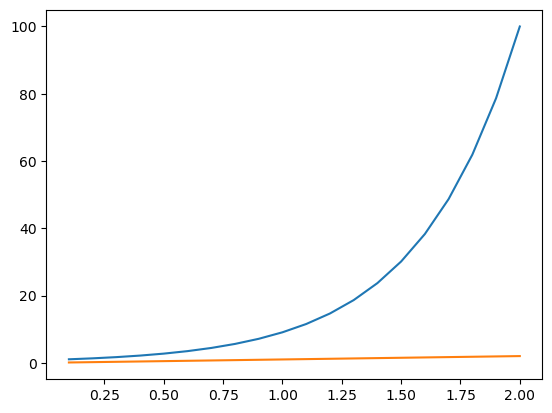

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(0.1, 2.0, 20), np.logspace(0.02, 2.0, 20))
plt.plot(np.linspace(0.1, 2.0, 20), np.linspace(0.1, 2.0, 20))

---------------

## 전치 연산

2차원 배열의 **전치(transpose) 연산**은 행과 열을 바꾸는 작업이다. 이는 배열의 **`T` 속성**으로 구할 수 있다. 메서드가 아닌 속성이라는 점에 유의 한다.

In [39]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [40]:
A.T

array([[1, 4],
       [2, 5],
       [3, 6]])

## 배열의 크기 변형

일단 만들어진 배열의 내부 데이터는 보존한 채로 형태만 바꾸려면 **`reshape` 명령**이나 메서드를 사용한다. 예를 들어 12개의 원소를 가진 1차원 행렬은 3x4 형태의 2차원 행렬로 만들 수 있다.

In [41]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [42]:
b = a.reshape(3, 4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

사용하는 원소의 갯수가 정해저 있기 때문에 `reshape` 명령의 형태 튜플의 원소 중 하나는 -1이라는 숫자로 대체할 수 있다. -1을 넣으면 해당 숫자는 다를 값에서 계산되어 사용된다.

In [43]:
a.reshape(3, -1)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [44]:
a.reshape(2, 2, -1)

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [45]:
a.reshape(2, -1, 2)

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

In [46]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

---
다차원 배열을 무조건 **1차원으로 펼치기** 위해서는 `flatten` 나 `ravel` 메서드를 사용한다.

In [47]:
b.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [48]:
b.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

###### ---
배열 사용에서 주의할 점은 길이가 6인 1차원 배열과 **행, 열의 갯수가 (6,1)인 2차원 배열** 또는 **행, 열의 갯수가 (1, 6)인 2차원 배열**은 데이터가 같아도 엄연히 다른 객체라는 점이다.

In [49]:
x = np.arange(6)  # vector
x, x.shape

(array([0, 1, 2, 3, 4, 5]), (6,))

In [50]:
x.reshape(1, 6)   # 행렬, ndim = 2

array([[0, 1, 2, 3, 4, 5]])

In [51]:
x.reshape(6, 1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [52]:
x.reshape(2, 3)

array([[0, 1, 2],
       [3, 4, 5]])

In [53]:
x

array([0, 1, 2, 3, 4, 5])

이렇게 같은 배열에 대해 차원만 1차원 증가시키는 경우에는 `newaxis` 명령을 사용하기도 한다.

In [54]:
x.shape

(6,)

In [55]:
x1 = x[:, np.newaxis]
x1

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [56]:
x1.shape

(6, 1)

In [57]:
x2 = x[np.newaxis, :]
x2

array([[0, 1, 2, 3, 4, 5]])

In [58]:
x2.shape

(1, 6)

## 배열 연결

행의 수나 열의 수가 같은 두 개 이상의 배열을 연결하여(concatenate) 더 큰 배열을 만들 때는 다음과 같은 명령을 사용한다.

* `hstack`
* `vstack`
* `dstack`
* `stack`
* `r_`
* `c_`
* `tile`

**`hstack` 명령**은 행의 수가 같은 두 개 이상의 **배열을 옆으로 연결**하여 열의 수가 더 많은 배열을 만든다. 연결할 배열은 하나의 리스트에 담아야 한다.

In [59]:
a1 = np.ones((2, 3))
a1

array([[1., 1., 1.],
       [1., 1., 1.]])

In [60]:
a2 = np.zeros((2, 2))
a2

array([[0., 0.],
       [0., 0.]])

In [61]:
np.hstack([a1, a2])

array([[1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0.]])

In [62]:
a3 = np.arange(10, 70, 10).reshape(2, 3)
a3

array([[10, 20, 30],
       [40, 50, 60]])

In [63]:
np.hstack([a1, a2, a3])

array([[ 1.,  1.,  1.,  0.,  0., 10., 20., 30.],
       [ 1.,  1.,  1.,  0.,  0., 40., 50., 60.]])

**`vstack` 명령**은 열의 수가 같은 두 개 이상의 배열을 **위아래로 연결**하여 행의 수가 더 많은 배열을 만든다. 연결할 배열은 마찬가지로 하나의 리스트에 담아야 한다.

In [64]:
b1 = np.ones((2, 3))
b1

array([[1., 1., 1.],
       [1., 1., 1.]])

In [65]:
b2 = np.zeros((3, 3))
b2

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [66]:
np.vstack([b1, b2])

array([[1., 1., 1.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

---
**`dstack` 명령**은 제3의 축 즉, **행이나 열이 아닌 깊이(depth) 방향으로 배열을 합친다. 가장 안쪽의 원소의 차원이 증가**한다. 즉 가장 내부의 숫자 원소가 배열이 된다. **shape 정보**로 보자면 가장 끝에 값이 2인 차원이 추가되는 것이다.이 예제의 경우에는 shape 변화가 2개의 (3 x 4) -> 1개의 (3 x 4 x **2**)가 된다.

In [67]:
c1 = np.ones((3, 4))
c1, c1.shape

(array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]),
 (3, 4))

In [68]:
c2 = np.zeros((3, 4))
c2, c2.shape

(array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]),
 (3, 4))

In [69]:
np.dstack([c1, c2])

array([[[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]]])

In [70]:
np.dstack([c1, c2]).shape

(3, 4, 2)

`dstack` 다른 예제
- 두 벡터 간의 dstack 연산의 결과도 3차원 array임에 유의!

In [71]:
c3 = np.ones(3)
c3, c3.shape

(array([1., 1., 1.]), (3,))

In [72]:
c4 = np.zeros(3)
c4, c4.shape

(array([0., 0., 0.]), (3,))

In [73]:
np.dstack([c3, c4])

array([[[1., 0.],
        [1., 0.],
        [1., 0.]]])

In [74]:
(np.dstack([c3, c4])).shape

(1, 3, 2)

(3, ) 벡터 간의 dstack 연산과, (1, 3) 행렬간의 dstack 연산 결과는 동일!

In [75]:
c5 = np.ones((1, 3))
c5

array([[1., 1., 1.]])

In [76]:
c6 = np.zeros(3)
c6

array([0., 0., 0.])

In [77]:
np.dstack([c3, c4])

array([[[1., 0.],
        [1., 0.],
        [1., 0.]]])

(3, 1) 행렬간의  dstack 연산은 다른 결과가 나온다.

In [78]:
c7 = np.ones((3, 1))
c7

array([[1.],
       [1.],
       [1.]])

In [79]:
c8 = np.zeros((3, 1))
c8

array([[0.],
       [0.],
       [0.]])

In [80]:
np.dstack([c7, c8])

array([[[1., 0.]],

       [[1., 0.]],

       [[1., 0.]]])

In [81]:
np.dstack([c7, c8]).shape

(3, 1, 2)

---
**`stack` 명령**은 **`dstack`** 의 기능을 확장한 것으로 **`dstack`** 처럼 마지막 차원으로 연결하는 것이 아니라 **사용자가 지정한 차원(축으로) 배열을 연결**한다. **`axis` 인수(디폴트 0)** 를 사용하여 연결후의 회전 방향을 정한다. 디폴트 인수값은 0이고 가장 앞쪽에 차원이 생성된다. 즉, 배열 두 개가 겹치게 되므로 연결하고자 하는 배열들의 크기가 모두 같아야 한다. 

다음 예에서는 **`axis`= 0** 이므로 **가장 바깥의 값이 2인 차원이 추가**된다. 즉, **shape 변화**는 2개의 (3 x 4) -> 1개의 (**2** x 3 x 4) 이다..

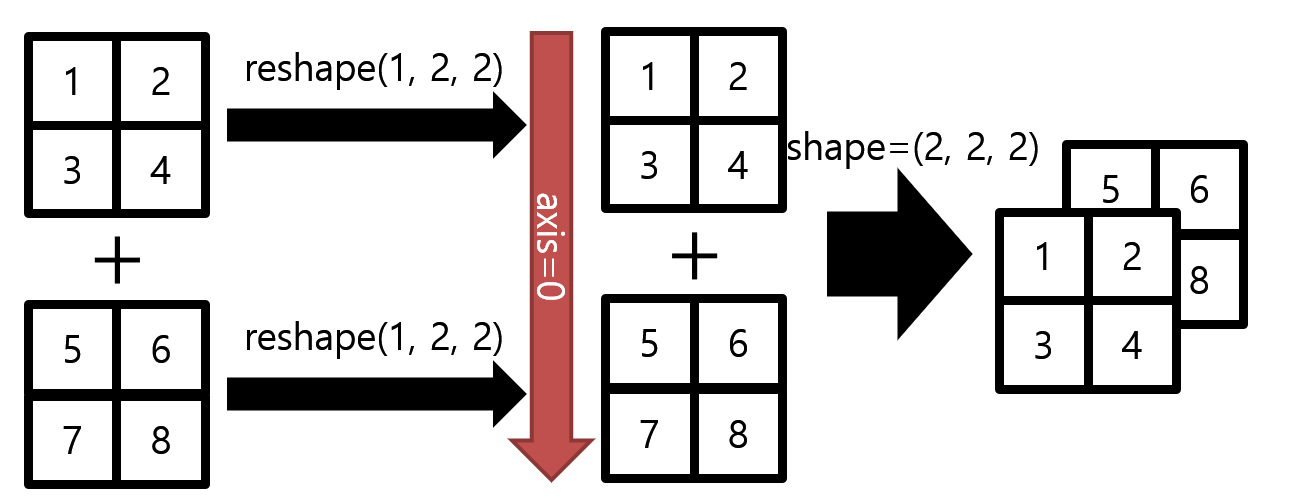

In [82]:
s0 = np.stack([c1, c2])  # axis = 0
s0

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [83]:
s0.shape

(2, 3, 4)

`axis` 인수가 1이면 두번째 차원으로 새로운 차원이 삽입된다. 다음 예에서 즉, shape 변화는 2개의 (3 x 4) -> 1개의 (3 x **2** x 4) 이다

In [84]:
s1 = np.stack([c1, c2], axis=1)
s1

array([[[1., 1., 1., 1.],
        [0., 0., 0., 0.]],

       [[1., 1., 1., 1.],
        [0., 0., 0., 0.]],

       [[1., 1., 1., 1.],
        [0., 0., 0., 0.]]])

In [85]:
s1.shape

(3, 2, 4)

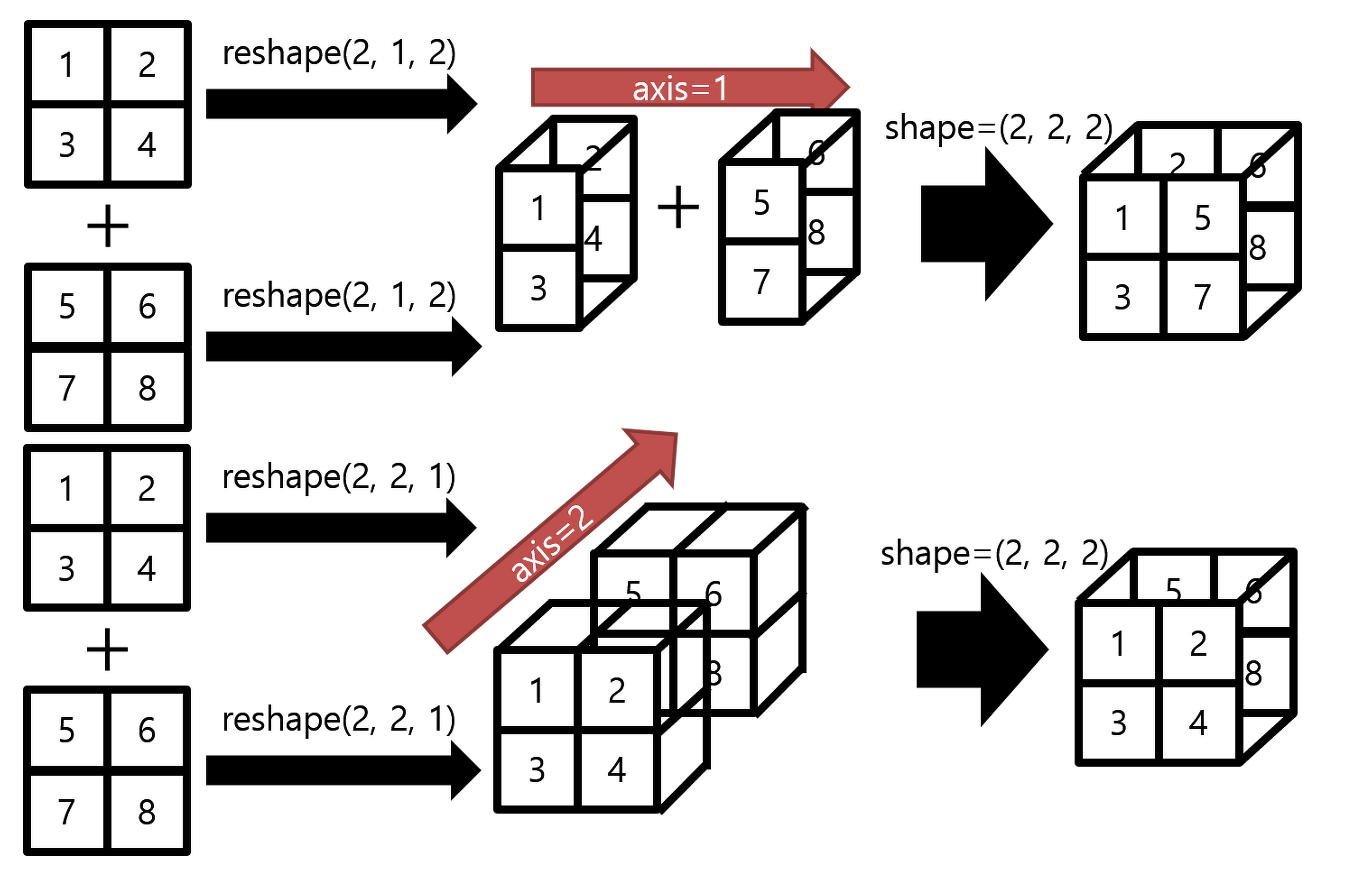

마찬가지로 `axis` 인수가 2이면 **세번째 차원으로 새로운 차원이 삽입**된다. 다음 예에서 즉, shape 변화는 2개의 (3 x 4) -> 1개의 (3 x 4 x  **2**) 이다

In [86]:
s2 = np.stack([c1, c2], axis=2)
s2

array([[[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]]])

In [87]:
s2.shape

(3, 4, 2)

**`r_` 메서드**는 **`hstack` 명령과 비슷**하게 **배열을 좌우로 연결**한다. 다만 메서드임에도 불구하고 **소괄호(parenthesis, `()`)를 사용하지 않고 인덱싱과 같이 대괄호(bracket, `[]`)를 사용**한다. 이런 특수 메서드를 **인덱서(indexer)**라고 한다.

In [88]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])
arr3 = np.r_[arr1, arr2]
arr3, arr3.shape

(array([1, 2, 3, 4, 5, 6]), (6,))

같은 작업을 hstack으로 표현해 보면...

In [89]:
np.hstack([arr1, arr2])

array([1, 2, 3, 4, 5, 6])

**`c_` 메서드**는 배열의 **차원을 증가시킨 후 좌우로 연결**한다. 만약 1차원 배열을 연결하면 2차원 배열이 된다.

In [90]:
arr4 = np.c_[np.array([1, 2, 3]), np.array([4, 5, 6])]
arr4, arr4.shape

(array([[1, 4],
        [2, 5],
        [3, 6]]),
 (3, 2))

**`tile` 명령**은 동일한 배열을 반복하여 연결한다.

In [91]:
a = np.array([[0, 1, 2], [3, 4, 5]])
a

array([[0, 1, 2],
       [3, 4, 5]])

In [92]:
np.tile(a, 2)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

In [93]:
np.tile(a, (1, 2))

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

In [94]:
np.tile(a, (3, 2))

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

#### 연습 문제 4.1.4

지금까지 공부한 명령어를 사용하여 다음과 같은 배열을 만들어라.

```python
       array([[   0.,    0.,    0.,    1.,    1.],
              [   0.,    0.,    0.,    1.,    1.],
              [   0.,    0.,    0.,    1.,    1.],
              [  10.,   20.,   30.,   40.,   50.],
              [  60.,   70.,   80.,   90.,  100.],
              [ 110.,  120.,  130.,  140.,  150.],
              [   0.,    0.,    0.,    1.,    1.],
              [   0.,    0.,    0.,    1.,    1.],
              [   0.,    0.,    0.,    1.,    1.],
              [  10.,   20.,   30.,   40.,   50.],
              [  60.,   70.,   80.,   90.,  100.],
              [ 110.,  120.,  130.,  140.,  150.]])
```

In [95]:
x1 = np.zeros((3, 3))
x1

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [96]:
x2 = np.ones((3, 2))
x2

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [97]:
x3 = np.arange(10, 160, 10).reshape((3, -1))
x3

array([[ 10,  20,  30,  40,  50],
       [ 60,  70,  80,  90, 100],
       [110, 120, 130, 140, 150]])

In [98]:
np.tile(np.vstack([np.hstack([x1, x2]), x3]), (2, 1))

array([[  0.,   0.,   0.,   1.,   1.],
       [  0.,   0.,   0.,   1.,   1.],
       [  0.,   0.,   0.,   1.,   1.],
       [ 10.,  20.,  30.,  40.,  50.],
       [ 60.,  70.,  80.,  90., 100.],
       [110., 120., 130., 140., 150.],
       [  0.,   0.,   0.,   1.,   1.],
       [  0.,   0.,   0.,   1.,   1.],
       [  0.,   0.,   0.,   1.,   1.],
       [ 10.,  20.,  30.,  40.,  50.],
       [ 60.,  70.,  80.,  90., 100.],
       [110., 120., 130., 140., 150.]])

---
### 2차원 그리드 포인트 생성

변수가 2개인 2차원 함수의 그래프를 그리거나 표를 작성하려면 **2차원 영역에 대한 (x,y) 좌표값 쌍** 즉, **그리드 포인트(grid point)** 를 생성하여 각 좌표에 대한 함수 값을 계산해야 한다. 예를 들어 x, y 라는 두 변수를 가진 함수에서 x가 0부터 2까지, y가 0부터 4까지의 사각형 영역에서 변화하는 과정을 보고 싶다면 이 사각형 영역 안의 다음과 같은 그리드 포인트들에 대해 함수를 계산해야 한다. 

$$ (x,y) = (0,0), (0,1), (0,2), (0,3), (0,4), (1,0), \cdots (2,4) $$

이러한 그리드 포인트를 만드는 과정을 도와주는 것이 `meshgrid` 명령이다. `meshgrid` 명령은 사각형 영역을 구성하는 가로축의 점들과 세로축의 점을 나타내는 두 벡터를 인수로 받아서 이 사각형 영역을 이루는 조합을 출력한다. 결과는 그리드 포인트의 x 값만을 표시하는 행렬과 y 값만을 표시하는 행렬 두 개로 분리하여 출력한다.

In [99]:
x = np.arange(3)
x

array([0, 1, 2])

In [100]:
y = np.arange(5)
y

array([0, 1, 2, 3, 4])

In [101]:
np.meshgrid(x, y)

(array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]),
 array([[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2],
        [3, 3, 3],
        [4, 4, 4]]))

In [102]:
X, Y = np.meshgrid(x, y)

In [103]:
X

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [104]:
Y

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [105]:
list(zip(X, Y))

[(array([0, 1, 2]), array([0, 0, 0])),
 (array([0, 1, 2]), array([1, 1, 1])),
 (array([0, 1, 2]), array([2, 2, 2])),
 (array([0, 1, 2]), array([3, 3, 3])),
 (array([0, 1, 2]), array([4, 4, 4]))]

In [106]:
[list(zip(x, y)) for x, y in zip(X, Y)]

[[(np.int64(0), np.int64(0)),
  (np.int64(1), np.int64(0)),
  (np.int64(2), np.int64(0))],
 [(np.int64(0), np.int64(1)),
  (np.int64(1), np.int64(1)),
  (np.int64(2), np.int64(1))],
 [(np.int64(0), np.int64(2)),
  (np.int64(1), np.int64(2)),
  (np.int64(2), np.int64(2))],
 [(np.int64(0), np.int64(3)),
  (np.int64(1), np.int64(3)),
  (np.int64(2), np.int64(3))],
 [(np.int64(0), np.int64(4)),
  (np.int64(1), np.int64(4)),
  (np.int64(2), np.int64(4))]]

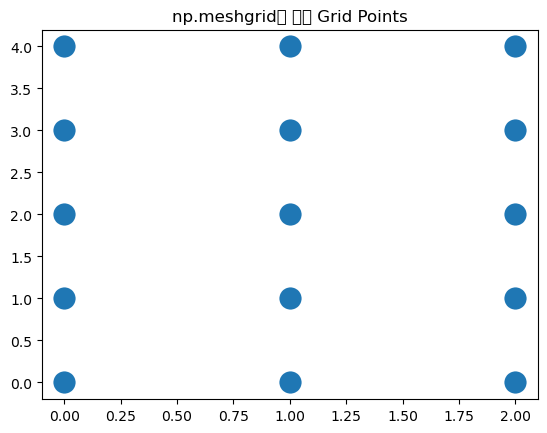

In [107]:
plt.title("np.meshgrid로 만든 Grid Points")
plt.scatter(X, Y, linewidths=10)
plt.show()

In [108]:
import matplotlib as mpl
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

In [109]:
mpl.rcParams['font.family'] = 'Gulim'